## Test 1: import c++ and add a single point
Starting from a single input point.  Store and input from python and plot there. 

In [1]:
import matplotlib.pyplot as plt

def scatter_plot_2d_vectors(ax, vectors):
    x = [vector[0] for vector in vectors]
    y = [vector[1] for vector in vectors]

    ax.scatter(x, y)
    #fig.xlabel('X')
    #fig.ylabel('Y')
    #fig.title('Scatter Plot of 2D Vectors')
    ax.grid(True)
    #fig.show()


/home/matthew/Documents/RRT-AR
/home/matthew/anaconda3/envs/RRT-AR/bin/python


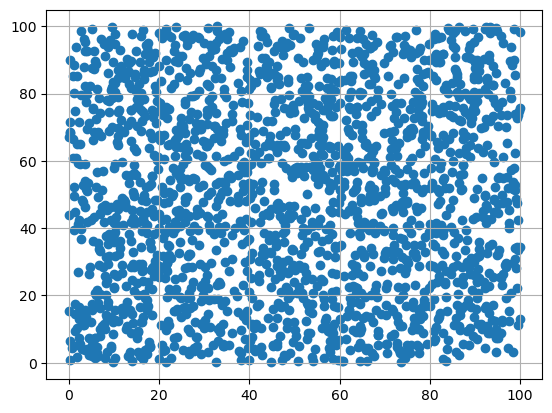

In [2]:
import os
print(os.getcwd())

import numpy as np
og = np.zeros((100,100), dtype=int)

import sys
print(sys.executable)
sys.path.insert(0, './build')
import RRTAR
fig = plt.figure()
ax = fig.add_subplot() 
scatter_plot_2d_vectors(ax, RRTAR.runRRT(4.0, 4.0, 2000, 5.0, og, [[90.0, 90.0]])[0])

## Test 2: Add an occupency grid

In [3]:
from matplotlib.colors import Normalize
from matplotlib.axes import Axes
def plot_og(ax: Axes, og: np.ndarray, cmap: str = "Greys", vmin=0, vmax=1):
    norm = Normalize(vmin=vmin, vmax=vmax)
    ax.imshow(og.T, cmap=cmap, norm=norm, origin="lower", interpolation=None)

In [4]:
import numpy as np
from scipy.spatial import Delaunay

constraints = []
constraints.append(np.array([[20, 20], [20, 50], [40, 50], [40, 20]]))
constraints.append(np.array([[60, 60], [60, 30], [40, 30], [40, 60]]))
yv, xv = np.meshgrid(range(0, 100), range(0, 100))
og = np.zeros_like(xv)

for constraint in constraints:
    hull = Delaunay(constraint)
    ogInner = np.zeros_like(xv)
    hei, wid = xv.shape
    for i in range(hei):
        for j in range(wid):
            ogInner[i, j] = hull.find_simplex([xv[i,j],yv[i,j]])


    og[ogInner != -1] = 1


0.02859807014465332


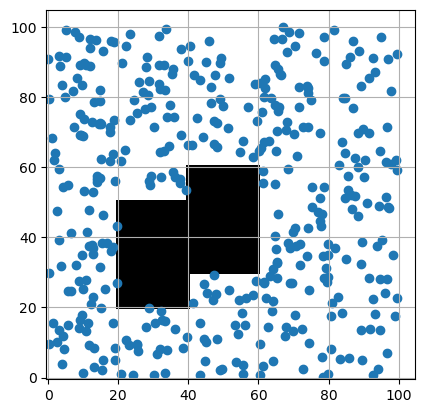

In [5]:
import time
fig = plt.figure()
ax = fig.add_subplot()
plot_og(ax, og)
t = time.time()
scatter_plot_2d_vectors(ax, RRTAR.runRRT(4.0, 4.0, 400, 10.0, og, [[90.0, 90.0]])[0])
# do stuff
print(time.time() - t)

## Test 3: Tree Plots
Shows the links between nodes

In [6]:
import matplotlib.pyplot as plt

def tree_plot_2d_vectors(vectors, og: np.ndarray, cmap: str = "Greys", vmin=0, vmax=1):
    fig, ax = plt.subplots()

    for vector in vectors:
        x = vector[0]
        y = vector[1]
        index = round(vector[2])

        if index > -1 and index < len(vectors):
            target_vector = vectors[index]
            target_x = target_vector[0]
            target_y = target_vector[1]

            ax.plot([x, target_x], [y, target_y], 'b-')
        ax.scatter(x, y, color='royalblue')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('RRT Tree plot')
    ax.grid(True)

    norm = Normalize(vmin=vmin, vmax=vmax)
    ax.imshow(og.T, cmap=cmap, norm=norm, origin="lower", interpolation=None)
    plt.show()



In [16]:
import sys
print(sys.executable)
sys.path.insert(0, './build')
import RRTAR
vectors = RRTAR.runRRT(40.0, 10.0, 1000, 5.0, og, [[90.0, 90.0]])[0]

/home/matthew/anaconda3/envs/RRT-AR/bin/python


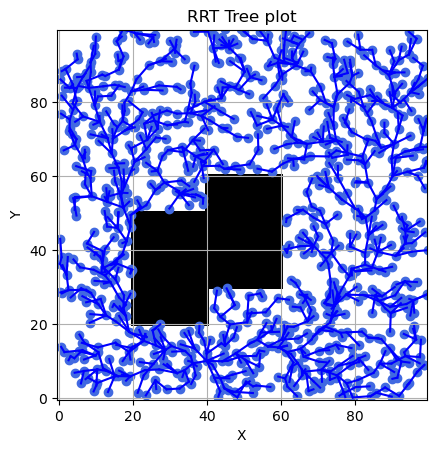

In [17]:
tree_plot_2d_vectors(vectors, og)

## Test 4: Terminal state


In [9]:
import matplotlib.pyplot as plt

def solution_plot_2d_vectors(vectors, og: np.ndarray, cmap: str = "Greys", vmin=0, vmax=1):
    fig, ax = plt.subplots()

    for i in range(len(vectors)):
        x = vectors[i][0]
        y = vectors[i][1]

        if i > 0:
            target_x = vectors[i-1][0]
            target_y = vectors[i-1][1]

            ax.plot([x, target_x], [y, target_y], 'b-')
        ax.scatter(x, y, color='royalblue')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('RRT Tree plot')
    ax.grid(True)

    norm = Normalize(vmin=vmin, vmax=vmax)
    ax.imshow(og.T, cmap=cmap, norm=norm, origin="lower", interpolation=None)
    plt.show()



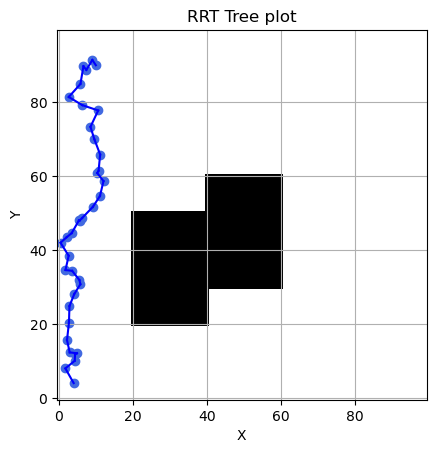

In [10]:
vectors = RRTAR.runRRT(4.0, 4.0, 2000, 5.0, og, [[10.0, 90.0],[90.0, 90.0]])
solution_plot_2d_vectors(vectors[1], og)

In [11]:
print(len(RRTAR.runRRT(4.0, 4.0, 1000, 5.0, og, [[90.0, 90.0]])[1]))

48
